<a href="https://colab.research.google.com/github/chxxrin/-C-/blob/main/20192120_%EB%B0%95%EC%B1%84%EB%A6%B0(80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best hyperparameters: {'kr__alpha': 1.0, 'kr__gamma': 1.0}
Root Mean Squared Error (RMSE) on test set with best model: 48.977419581418495
Predicted energy for new data: [1.466518e-35]


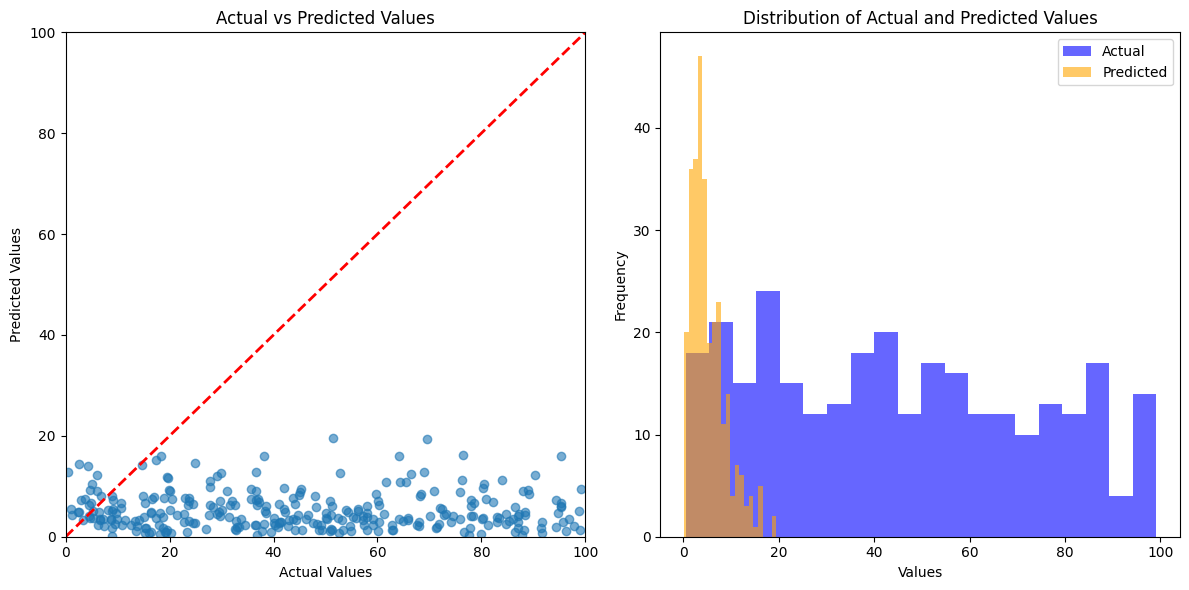

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt

# 데이터셋 생성 (실제 데이터를 사용해야 함)
# 예제로 사용하는 데이터는 임의로 생성된 데이터입니다.
np.random.seed(0)
num_samples = 1473
num_features = 10

X = np.random.rand(num_samples, num_features)
y = np.random.rand(num_samples) * 100  # 실제 데이터를 반영하는 방식으로 수정 필요

# 데이터를 train set과 test set으로 분할 (test set:train set = 20:80)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 커널 릿지 회귀 모델 정의
kr_model = KernelRidge(kernel='rbf')

# 파이프라인 정의 (정규화 -> 커널 릿지 회귀)
model_pipeline = Pipeline([('scaler', scaler), ('kr', kr_model)])

# 최적의 하이퍼파라미터 탐색을 위한 GridSearchCV 설정
param_grid = {
    'kr__alpha': [0.001, 0.01, 0.1, 1.0],
    'kr__gamma': [0.001, 0.01, 0.1, 1.0]
}

# RMSE를 평가 지표로 사용하는 GridSearchCV 설정
rmse_scorer = make_scorer(mean_squared_error, squared=False)
grid_search = GridSearchCV(model_pipeline, param_grid, scoring=rmse_scorer, cv=3)

# 모델 훈련 및 최적의 모델 확인
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_) # GridSearchCV를 통해 최적화된 하이퍼파라미터

# 최적의 모델을 사용해 테스트 세트로 예측
y_pred_best = best_model.predict(X_test_scaled)

# RMSE를 사용하여 최적 모델의 예측 성능 평가
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"Root Mean Squared Error (RMSE) on test set with best model: {rmse_best}") # 테스트 셋에서 최적 모델을 평가한 결과(RMSE 값)

# 훈련된 모델 저장
joblib.dump(best_model, 'kr_model.pkl')

# 훈련된 모델 불러오기
loaded_model = joblib.load('kr_model.pkl')

# 새로운 데이터에 대한 예측 예시
new_data = np.array([[1.3, 0.6, 0.7, 3.3, 0.8, 1.2, 0.4, 0.5, 1.0, 2.0]])
new_data_scaled = scaler.transform(new_data)
predicted_value = loaded_model.predict(new_data_scaled)
print(f"Predicted energy for new data: {predicted_value}") # 새로운 데이터에 대한 예측 결과

# 테스트 데이터 예측 결과 시각화 (산점도와 히스토그램)
plt.figure(figsize=(12, 6))

# 산점도
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([0, 100], [0, 100], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlim(0, 100)
plt.ylim(0, 100)

# 히스토그램
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=20, alpha=0.6, label='Actual', color='blue')
plt.hist(y_pred_best, bins=20, alpha=0.6, label='Predicted', color='orange')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()